<a href="https://colab.research.google.com/github/aslla77/lab-study/blob/main/2022_winter_study/Generalized_Lotka_Volterra_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [798]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# *Generalized Lotka-Volterra equation*

$\dot x_1 = rx_1 -a x_1^2 - bx_1 x_2$

$\dot x_2 = rx_2 -cx_1 x_2 - dx_2^2$

In [799]:
def x_pop():
  x1=np.zeros(int(params['t']/params['dt']))
  x2=np.zeros(int(params['t']/params['dt']))
  x1[0]=params['x1_0']
  x2[0]=params['x2_0']
  return x1,x2



In [800]:
def fx(x1,x2):
  x1_result=params['r1']*x1 -params['a']*(x1**2) -params['b']*x1*x2
  x2_result=params['r2']*x2 -params['c']*(x2*x1) -params['d']*(x2**2)
  return x1_result,x2_result

def Euler():
  x1,x2=x_pop()
  for i in range(1,len(x1)):
    fx_1,fx_2=fx(x1[i-1],x2[i-1])
    x1[i]=x1[i-1]+fx_1*params['dt']
    x2[i]=x2[i-1]+fx_2*params['dt']
    if x1[i]<0:
      x1[i]=0
    if x2[i]<0:
      x2[i]=0
  return x1,x2

def x_mod_Euler():
  x1,x2=x_pop()
  x1_list,x2_list=Euler()
  for i in range(1,len(x1)):
    x1[i]=x1[i-1]+(fx(x1[i-1],x2[i-1])[0]+fx(x1_list[i],x2_list[i])[0])/2*params['dt']
    x2[i]=x2[i-1]+(fx(x1[i-1],x2[i-1])[1]+fx(x1_list[i],x2_list[i])[1])/2*params['dt']
  return x1,x2

def x_midpoint():
  x1,x2=x_pop()
  for i in range(1,len(x1)):
    temp1=x1[i-1]+fx(x1[i-1],x2[i-1])[0]*params['dt']/2
    temp2=x2[i-1]+fx(x1[i-1],x2[i-1])[1]*params['dt']/2
    x1[i]=x1[i-1]+fx(temp1,temp2)[0]*params['dt']
    x2[i]=x2[i-1]+fx(temp1,temp2)[1]*params['dt']
  return x1,x2

def runge_kutta():
  x1,x2=x_pop()
  for i in range(1,len(x1)):
    k1=fx(x1[i-1],x2[i-1])[0]*params['dt']
    k2_1=fx(x1[i-1],x2[i-1])[1]*params['dt']

    k2=fx(x1[i-1]+k1/2,x2[i-1]+k2_1/2)[0]*params['dt']
    k2_2=fx(x1[i-1]+k1/2,x2[i-1]+k2_1/2)[1]*params['dt']

    k3=fx(x1[i-1]+k2/2,x2[i-1]+k2_2/2)[0]*params['dt']
    k2_3=fx(x1[i-1]+k2/2,x2[i-1]+k2_2/2)[1]*params['dt']

    k4=fx(x1[i-1]+k3,x2[i-1]+k2_3)[0]*params['dt']
    k2_4=fx(x1[i-1]+k3,x2[i-1]+k2_3)[1]*params['dt']

    x1[i]=x1[i-1]+1/6*(k1+2*k2+2*k3+k4)
    x2[i]=x2[i-1]+1/6*(k2_1+2*k2_2+2*k2_3+k2_4)
  return x1,x2

In [801]:
#figre function
def fig(x1,x2,title):
  plt.figure(figsize=(5,2))
  plt.subplot(1,2,1)
  plt.plot(t_list,x1,label='x1')
  plt.plot(t_list,x2,label='x2')
  plt.ylim(0,max(max(x1),max(x2))*1.1)
  plt.xlim(0,params['t'])
  plt.legend()
  plt.xlabel('t')
  plt.ylabel('pop')

  plt.subplot(1,2,2)
  plt.plot(x1,x2)
  plt.ylim(0,max(max(x1),max(x2))*1.1)
  plt.xlim(0,max(max(x1),max(x2))*1.1)
  plt.xlabel('x1')
  plt.ylabel('x2')

  for i in range(1,len(x1),10):
    plt.annotate('',xy=(x1[i],x2[i]),xytext=(x1[i-1],x2[i-1]),arrowprops=dict(facecolor='black',arrowstyle='-|>,head_width=0.4'))

  plt.suptitle(title)
  plt.show()


def phase(x1=10,x2=10):
  A=np.arange(0,int(max(max(x1),max(x2))))
  B=np.arange(0,int(max(max(x1),max(x2))))
  if max(x1)<10 and max(x2)<10:
    A=np.arange(0,int(max(max(x1),max(x2))),0.1)
    B=np.arange(0,int(max(max(x1),max(x2))),0.1)
  X,Y=np.meshgrid(A,B)
  C=params['r1']*X -params['a']*(X**2) -params['b']*X*Y
  D=params['r2']*Y -params['c']*(Y*X) -params['d']*(Y**2)
  plt.quiver(X,Y,C,D ,color='red')

  if params['a']!=0 and params['d']!=0:
    x_1=params['r1']/params['a']-params['b']/params['a']*B
    x_2=params['r2']/params['d']-params['c']/params['d']*A

    plt.plot(A,x_1,color='blue')
    plt.plot(x_2,B,color='green')

  # else:
  #   x_1=params['r1']-params['b']*B
  #   x_2=params['c']*A-params['r2']
  #   plt.plot(A,x_1,color='blue')
  #   plt.plot(x_2,B,color='green')

  plt.ylim(0,max(max(x1),max(x2)))
  plt.xlim(0,max(max(x1),max(x2)))
  plt.show()

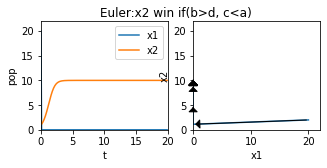

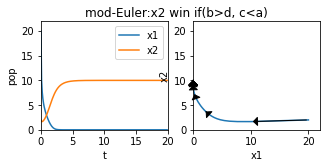

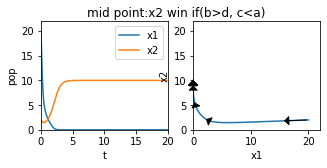

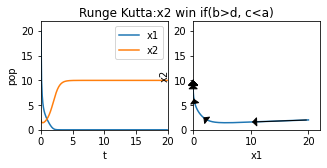

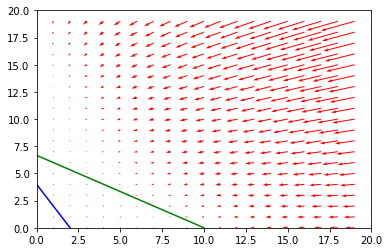

In [802]:
# x2 win b>d, c<a
params={'x1_0':20,
        'x2_0':2,
        't':20,
        'r1':2,
        'r2':2,
        'a':0.5,
        'b':1,
        'c':0.3,
        'd':0.2,
        'dt':0.1}
t_list=np.arange(0,params['t'],params['dt'])

title='x2 win if(b>d, c<a)'
#Euler
x1,x2=Euler()
fig(x1,x2,'Euler:'+title)

#mod Euler
x1,x2=x_mod_Euler()
fig(x1,x2,'mod-Euler:'+title)

#midpoint
x1,x2=x_midpoint()
fig(x1,x2,'mid point:'+title)

#4th
x1,x2=runge_kutta()
fig(x1,x2,'Runge Kutta:'+title)

phase(x1,x2)

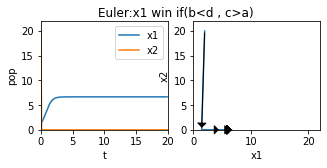

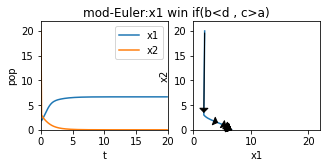

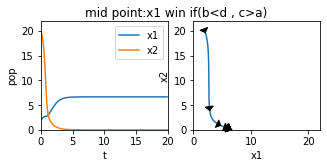

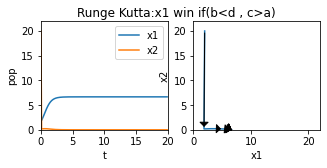

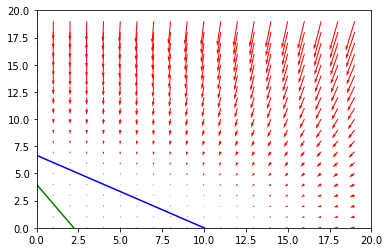

In [803]:
#x1 win b<d , c>a
params={'x1_0':2,
        'x2_0':20,
        't':20,
        'r1':2,
        'r2':2,
        'a':0.3,
        'b':0.2,
        'c':0.5,
        'd':0.9,
        'dt':0.1}
t_list=np.arange(0,params['t'],params['dt'])

title='x1 win if(b<d , c>a)'
#Euler
x1,x2=Euler()
fig(x1,x2,'Euler:'+title)

#mod Euler
x1,x2=x_mod_Euler()
fig(x1,x2,'mod-Euler:'+title)

#midpoint
x1,x2=x_midpoint()
fig(x1,x2,'mid point:'+title)

#4th
x1,x2=runge_kutta()
fig(x1,x2,'Runge Kutta:'+title)

phase(x1,x2)

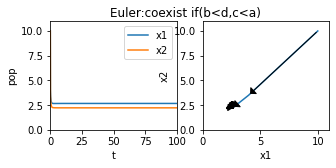

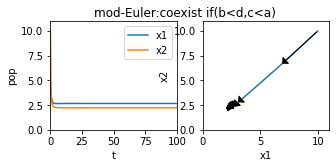

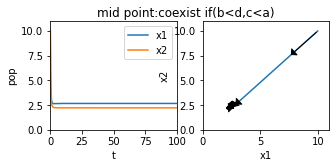

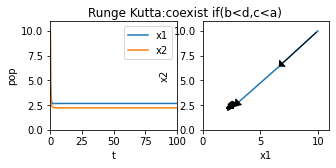

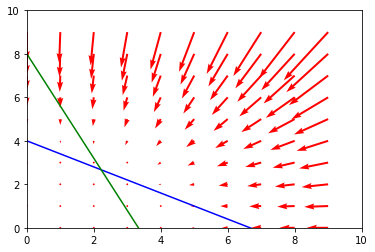

(x,y)=(2.666667,2.222222)


In [804]:
# coexist b<d,c<a
params={'x1_0':10,
        'x2_0':10,
        't':100,
        'r1':2,
        'r2':2,
        'a':0.5,
        'b':0.3,
        'c':0.25,
        'd':0.6,
        'dt':0.1}
t_list=np.arange(0,params['t'],params['dt'])

title='coexist if(b<d,c<a)'
#Euler
x1,x2=Euler()
fig(x1,x2,'Euler:'+title)

#mod Euler
x1,x2=x_mod_Euler()
fig(x1,x2,'mod-Euler:'+title)

#midpoint
x1,x2=x_midpoint()
fig(x1,x2,'mid point:'+title)

#4th
x1,x2=runge_kutta()
fig(x1,x2,'Runge Kutta:'+title)

params['x1_0']=1
params['x2_0']=1

phase(x1,x2)
print('(x,y)=({0:f},{1:f})'.format(x1[-1],x2[-1]))


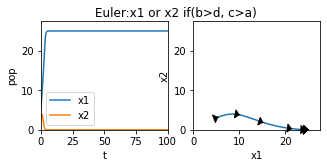

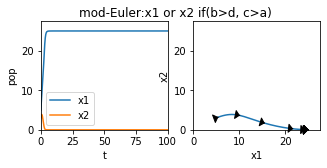

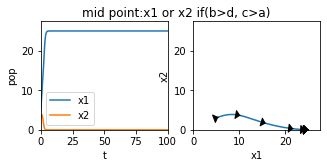

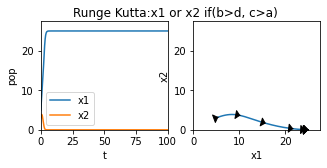

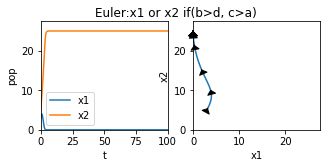

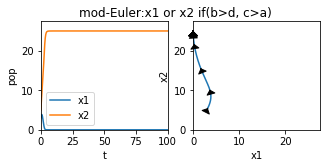

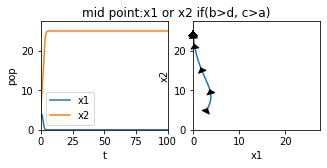

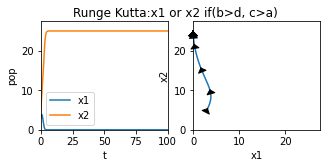

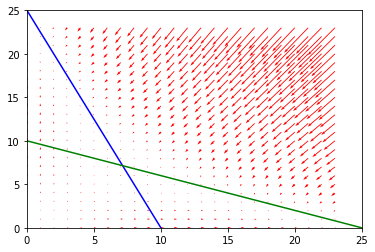

In [805]:
# x1 or x2 b>d, c>a
params={'x1_0':5,
        'x2_0':3,
        't':100,
        'r1':2,
        'r2':2,
        'a':0.08,
        'b':0.2,
        'c':0.2,
        'd':0.08,
        'dt':0.1}
t_list=np.arange(0,params['t'],params['dt'])

title='x1 or x2 if(b>d, c>a)'

#Euler
x1,x2=Euler()
fig(x1,x2,'Euler:'+title)

#mod Euler
x1,x2=x_mod_Euler()
fig(x1,x2,'mod-Euler:'+title)

#midpoint
x1,x2=x_midpoint()
fig(x1,x2,'mid point:'+title)

#4th
x1,x2=runge_kutta()
fig(x1,x2,'Runge Kutta:'+title)

params['x1_0']=3
params['x2_0']=5
t_list=np.arange(0,params['t'],params['dt'])

#Euler
x1,x2=Euler()
fig(x1,x2,'Euler:'+title)

#mod Euler
x1,x2=x_mod_Euler()
fig(x1,x2,'mod-Euler:'+title)

#midpoint
x1,x2=x_midpoint()
fig(x1,x2,'mid point:'+title)

#4th
x1,x2=runge_kutta()
fig(x1,x2,'Runge Kutta:'+title)

phase(x1,x2)

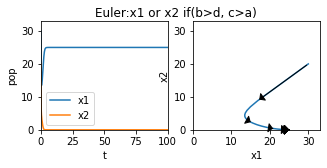

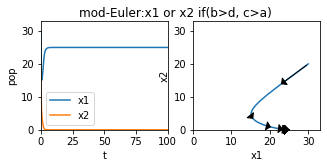

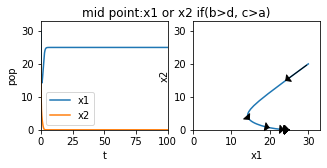

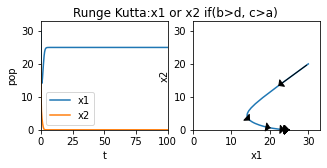

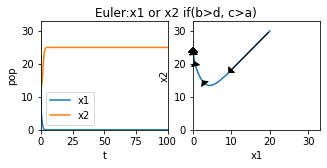

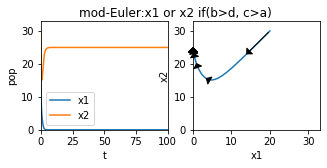

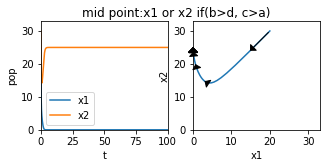

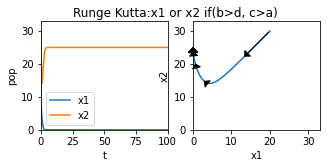

In [806]:
params['x1_0']=30
params['x2_0']=20
t_list=np.arange(0,params['t'],params['dt'])


#Euler
x1,x2=Euler()
fig(x1,x2,'Euler:'+title)

#mod Euler
x1,x2=x_mod_Euler()
fig(x1,x2,'mod-Euler:'+title)

#midpoint
x1,x2=x_midpoint()
fig(x1,x2,'mid point:'+title)

#4th
x1,x2=runge_kutta()
fig(x1,x2,'Runge Kutta:'+title)

params['x1_0']=20
params['x2_0']=30
t_list=np.arange(0,params['t'],params['dt'])


#Euler
x1,x2=Euler()
fig(x1,x2,'Euler:'+title)

#mod Euler
x1,x2=x_mod_Euler()
fig(x1,x2,'mod-Euler:'+title)

#midpoint
x1,x2=x_midpoint()
fig(x1,x2,'mid point:'+title)

#4th
x1,x2=runge_kutta()
fig(x1,x2,'Runge Kutta:'+title)

$\dot x_1 = r_1 x_1  - bx_1 x_2$

$\dot x_2 = -r_2 x_2 + cx_1 x_2 $

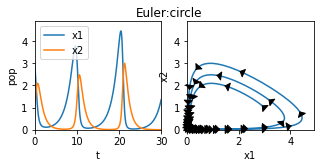

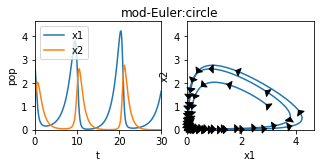

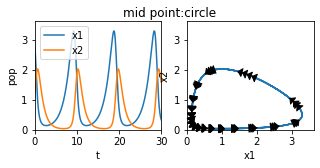

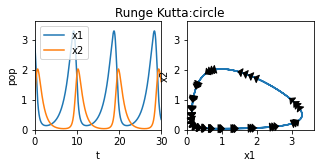

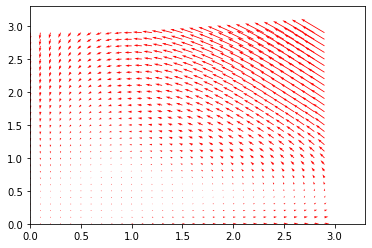

In [808]:
params={'x1_0':3,
        'x2_0':1,
        't':30,
        'r1':2/3,
        'r2':-1,
        'a':0.,
        'b':4/3,
        'c':-1,
        'd':0.,
        'dt':0.05}

t_list=np.arange(0,params['t'],params['dt'])

title='circle'

#Euler
x1,x2=Euler()
fig(x1,x2,'Euler:'+title)

#mod Euler
x1,x2=x_mod_Euler()
fig(x1,x2,'mod-Euler:'+title)

#midpoint
x1,x2=x_midpoint()
fig(x1,x2,'mid point:'+title)

#4th
x1,x2=runge_kutta()
fig(x1,x2,'Runge Kutta:'+title)

phase(x1,x2)